<a href="https://colab.research.google.com/github/CMOONCS/NLP-Gender-Bias/blob/main/Preliminary_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Install libraries if needed</b>

<i>Note: To make and save the changes to the colab notebook go to 'File -> Save a copy in Drive' </i>


In [ ]:
!pip install pandas
!pip install sklearn
!pip install gensim

##### <b>Import libraries and give input corpus 

In [ ]:
import pandas as pd
import numpy as np
import sklearn
#### Define Training courpus
CORPUS1= ['Good car',
   'Good and fast',
    'I like this car']


#Can also try other corups    
"""
### Other corpus sets can be tried out ###
CORPUS2 = ['the green car is fast',
'The blue car has low mileage',
'Your car has high mileage',
'I buy green shirt because it fits my blue eyes']

CORPUS3 = ["the house had a tiny little mouse", 
"the cat saw the mouse", 
"the mouse ran away from the house", 
"the cat finally ate the mouse", 
"the end of the mouse story"]
"""

'\n### Other corpus sets can be tried out ###\nCORPUS2 = [\'the green car is fast\',\n\'The blue car has low mileage\',\n\'Your car has high mileage\',\n\'I buy green shirt because it fits my blue eyes\']\n\nCORPUS3 = ["the house had a tiny little mouse", \n"the cat saw the mouse", \n"the mouse ran away from the house", \n"the cat finally ate the mouse", \n"the end of the mouse story"]\n'

# 1. Bag-of-words (BoW) Model 
The following code models text documents using bag-of-words (BoW). Here are three simple sentences (text documents) :

## 1.1 A  unigram model

In [ ]:

### BoW model
from sklearn.feature_extraction.text import CountVectorizer
def bow_generator1(corpus, ngram_range=(1,1)):# a unigram model
    vectorizer = CountVectorizer(min_df=1, ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features
 
 
# build BoW vectorizer and get terms
bow_vectorizer1, bow_terms1 = bow_generator1(CORPUS1)


#### 1.1.1 Based on these  text documents, a list of terms is constructed as follows:

In [ ]:
term_names1 = bow_vectorizer1.get_feature_names_out()
print ("Term names",term_names1)
print ('Number of terms:',len(term_names1))

Term names ['and' 'car' 'fast' 'good' 'like' 'this']
Number of terms: 6


#### 1.1.2 Construct the following lists to record the term frequencies  of distinct terms 

In [ ]:
terms1 = (bow_terms1.todense())
print (terms1)

[[0 1 0 1 0 0]
 [1 0 1 1 0 0]
 [0 1 0 0 1 1]]


#### 1.1.3 Create a data frame from the vectors

In [ ]:
terms1 = (bow_terms1.todense())
df_train1 = pd.DataFrame(data=terms1, columns=term_names1)
df_train1.head()

,and,car,fast,good,like,this
0,0,1,0,1,0,0
1,1,0,1,1,0,0
2,0,1,0,0,1,1


## 1.2 n-gram (n=2)

In [ ]:
## here we define n=2
def bow_generator2(corpus, ngram_range=(1,2)):# a bigram model
    vectorizer = CountVectorizer(min_df=1, ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features
 
# build bow vectorizer and get terms
bow_vectorizer2, bow_terms2 = bow_generator2(CORPUS1)

#### 1.2.1 Based on the text documents, a list is constructed as follows for each document:

In [ ]:
# print the term names
term_names2 = bow_vectorizer2.get_feature_names_out()
print (term_names2)

['and' 'and fast' 'car' 'fast' 'good' 'good and' 'good car' 'like'
 'like this' 'this' 'this car']


#### 1.2.2  Construct the following lists to record the term frequencies of all the distinct terms 

In [ ]:
terms2 = (bow_terms2.todense())
print (terms2)

[[0 0 1 0 1 0 1 0 0 0 0]
 [1 1 0 1 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 1 1 1]]


#### 1.2.3 Create a data frame from the vectors

In [ ]:
df_train2 = pd.DataFrame(data=terms2, columns=term_names2)
df_train2.head()

,and,and fast,car,fast,good,good and,good car,like,like this,this,this car
0,0,0,1,0,1,0,1,0,0,0,0
1,1,1,0,1,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,1,1,1


# 2. Term Frequency–Inverse Document Frequency (TF-IDF) Model
It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The TF–IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. <a href="https://en.wikipedia.org/wiki/Tf–idf"> Find more information using this wikipedia link</a>

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(norm='l2',smooth_idf=True, use_idf=True) 
tfidf_matrix = transformer.fit_transform(bow_terms2)
terms3 = np.round(tfidf_matrix.todense(), 1)
 
df_tfidf = pd.DataFrame(data=terms3, columns=term_names2)
df_tfidf.head()

,and,and fast,car,fast,good,good and,good car,like,like this,this,this car
0,0.0,0.0,0.5,0.0,0.5,0.0,0.7,0.0,0.0,0.0,0.0
1,0.5,0.5,0.0,0.5,0.4,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5


# 3.Word2vec 
(a short demo)

##### Install libraries if needed

In [ ]:
!pip install nltk

!pip install gensim

### 3.1 Tokenize the input text

In [ ]:
import nltk
nltk.download('punkt')
# tokenize corpora
TOKENIZED_CORPUS = [nltk.word_tokenize(sentence) for sentence in CORPUS1]## use same CORPUS to train
#new_doc = ['Your car has high mileage']
#tokenized_new_doc = [nltk.word_tokenize(sentence) for sentence in new_doc]
#print(tokenized_new_doc)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
### Check tokenize text
TOKENIZED_CORPUS

[['Good', 'car'], ['Good', 'and', 'fast'], ['I', 'like', 'this', 'car']]

### 3.3 Dictionary of words in the corpus

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(TOKENIZED_CORPUS)
print(dictionary.token2id)

{'Good': 0, 'car': 1, 'and': 2, 'fast': 3, 'I': 4, 'like': 5, 'this': 6}


### 3.4 Use gensim library to implement Word2Vec

In [ ]:
import gensim
# build the word2vec model on our training corpus
model = gensim.models.Word2Vec(TOKENIZED_CORPUS, size=5, window=2, min_count=1)# size= 5 is dimension of one vector
model.train(TOKENIZED_CORPUS,total_examples=model.corpus_count, epochs=model.epochs)
model.save("model")

### 3.5 Vector representation for words (present in corpus dictionary)

In [ ]:
print('Representation of word \'Good\'',model.wv['Good'])

Representation of word 'Good' [ 0.08090847 -0.09519257 -0.01315557  0.08051383  0.09837685]


### 3.6 Plot word vectors using PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


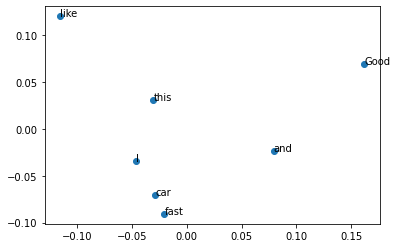

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

### 3.7 Plot word vectors using TSNE tool

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


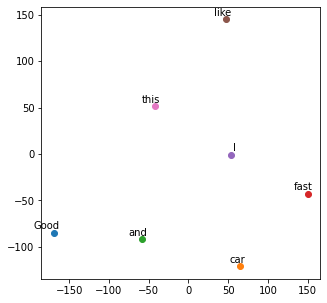

In [ ]:
## define a function to plot 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
def tsne_plot(model,words_labels):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in words_labels:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(5, 5)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
 ## call this function
words = list(model.wv.vocab) 
tsne_plot(model,words)

<b>--> Extending previously trained Word2Vec model by adding new data

In [ ]:
New_Corpus = ["This car can hit 100 miles per hour"]
TOKENIZED_CORPUS_new = [nltk.word_tokenize(sentence) for sentence in New_Corpus]
model.build_vocab(TOKENIZED_CORPUS_new,update = True)
#model_new = gensim.models.Word2Vec(TOKENIZED_CORPUS_new, size=5, window=2,min_count=1)
#model.reset_from(model_new)
model.train(TOKENIZED_CORPUS_new,total_examples=model.corpus_count, epochs=model.epochs)

(4, 40)

In [ ]:
print('Representation of word \'miles\'',model.wv['miles'])

Representation of word 'miles' [ 0.08370174 -0.04442116 -0.01355224  0.01648985  0.01929059]


<b>--> TSNE plot of word vectors with newly extended vocabuary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


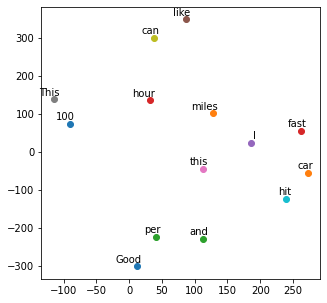

In [ ]:
words = list(model.wv.vocab)
tsne_plot(model,words)